<a href="https://colab.research.google.com/github/veninayuliya/PCVK_Modul1/blob/main/PCVK_Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


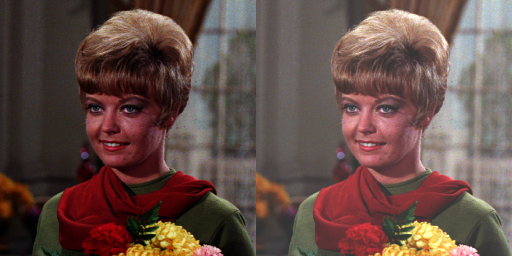

In [3]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


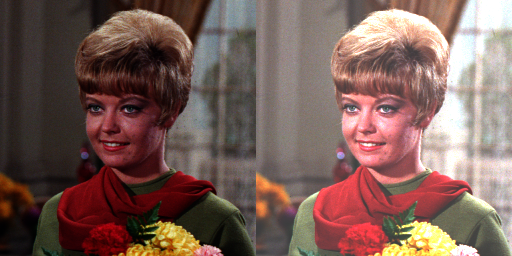

In [10]:
#TUGAS
# NO 1: transformasi contrast dan brightness
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('---------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan transformasi Log
---------------------------------------------------------
Masukkan nilai kecerahan: 40


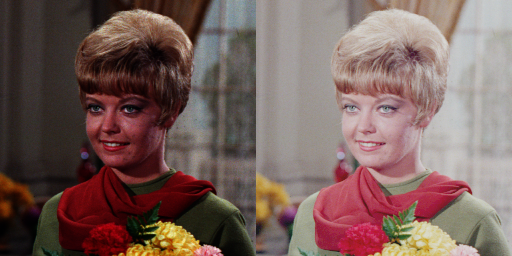

In [11]:
# NO 2: transformasi logarithmic brightness
print(' Mengubah tingkat kecerahan citra dengan transformasi Log')
print('---------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
log_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log_image[y,x,c] = np.clip(brightness * np.log(1 + original[y,x,c]), 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)


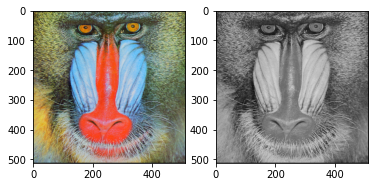

In [14]:
# NO 3: averaging
original_avg = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
original_rgb = cv.cvtColor(original_avg, cv.COLOR_BGR2RGB)
original_avg[:] = original_avg.mean(axis=-1, keepdims=1)
fig, axarr = plt.subplots(1,2)
axarr[0].imshow(original_rgb)
axarr[1].imshow(original_avg)

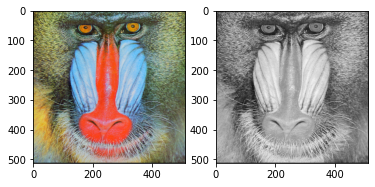

In [16]:
# NO 3: lightness
R, G, B = original_rgb[:,:,0], original_rgb[:,:,1], original_rgb[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original_rgb)
axarr[1].imshow(gray_img,cmap='gray')

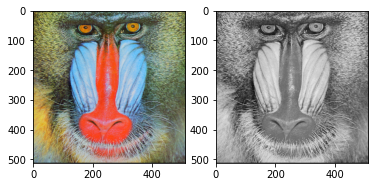

In [18]:
# NO 3: luminance
R, G, B = original_rgb[:,:,0], original_rgb[:,:,1], original_rgb[:,:,2]

gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original_rgb)
axarr[1].imshow(gray_img,cmap='gray')

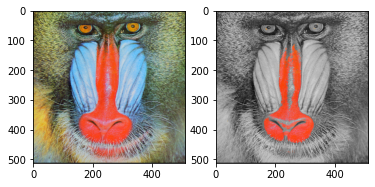

In [22]:
# NO 4: menampilkan grayscale kecuali warna merah
original = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
red, mask1 = cv.threshold(original[:,:,2], 230, 255, cv.THRESH_BINARY)

mask2 = np.zeros_like(original)
mask2[:,:,0] = mask1
mask2[:,:,1] = mask1
mask2[:,:,2] = mask1

red = cv.bitwise_and(original_rgb, mask2)

gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

original = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(original, 255 - mask2)

output = gray + red

fig, axarr = plt.subplots(1,2)
axarr[0].imshow(original_rgb)
axarr[1].imshow(output, cmap='gray')